## Fortgeschrittene KI

In diesem Abschnitt werden die Daten der fortgeschrittenen KI/EA visualisiert.
Diese besitzt nun drei verschiedene Gene welche je nach Situation aktiviert werden.

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_EA = pd.read_csv('Data/EA2.csv', index_col=[0], sep=';')
#df_EA = pd.read_csv('Data/EA2_punkteBasiert.csv', index_col=[0], sep=';')

evolutions = df_EA.groupby(df_EA.index).size().iloc[:1].values # get the number of evolutions
KINumber = df_EA.groupby(df_EA.index).size().size # get the number of different KIs (individuals)
df_EA['Evolution'] = np.arange(evolutions).repeat(KINumber) # add new evolution column
df_EA = df_EA.reset_index().set_index(['Evolution', 'Name']) #make multiindex

### Calulate more Data for analysis
df_Mean = df_EA.groupby(level=0).agg(['mean']).stack(1) # calc mean for every evolution
df_Mean = df_Mean.reset_index().set_index(['Evolution']) #remove multiindex
df_Mean.drop(['Winner', "level_1"], axis=1, inplace=True) # remove useless columns
### Calculates the win percentage of each evolution.
df_wincounter = df_EA.groupby(level=0)['Winner'].value_counts().unstack(fill_value=0).stack().to_frame()
df_cleaned = df_wincounter.rename(columns={0: "WinPercent"}).reset_index().set_index(['Evolution'])
df_winner = df_cleaned.loc[df_cleaned['Winner'] == True]
df_winner.drop(['Winner'], axis=1) # remove useless columns
df_Mean['WinPercent'] = df_winner['WinPercent'].apply(lambda x: x / KINumber * 100) # calculate winpercentage
### Calculate standard deviation
df_standardDeviation = df_EA.std(axis = 0, skipna = True, level = 0)
df_standardDeviation.drop(['Winner', "Fitness", "Score", "GameTime"], axis=1, inplace=True)

domi1 = df_EA[df_EA['dominanceLevel'] == 1]
domi2 = df_EA[df_EA['dominanceLevel'] == 2]
domi3 = df_EA[df_EA['dominanceLevel'] == 3]
domi = df_EA.iloc[df_EA.index.get_level_values('Evolution') == 8]
df_Mean

,Fitness,GameTime,Score,deffScore,suppScore,townLifeDeviation,supportActions,attackActions,dominanceLevel,deff-ConquerRadius,...,supp-ConquerRadius,supp-AttackMinLife,supp-SupportRadius,supp-SupportMaxCap,supp-SupportMinCap,SupportTownRatio,DeffTownRatio,AtkTownRatio,CategorisationRadius,WinPercent
Evolution,,,,,,,,,,,,,,,,,,,,,
0,-1.272343,703.410,1.444802,-3.20,0.482856,48.33985,0.065,1.725,1.965,2040.640,...,2016.540,47.925,1990.495,49.825,51.050,50.920,47.895,48.150,1861.270,3.5
1,1.941315,686.770,1.564802,-0.25,0.626513,47.73045,0.115,1.560,2.920,1932.535,...,2071.600,47.320,2131.055,49.710,49.410,50.375,49.300,49.000,1815.725,4.5
2,2.107405,696.305,1.634802,-0.20,0.672603,47.71815,0.395,1.560,2.910,1947.970,...,2034.665,44.160,2253.770,46.750,48.385,52.010,51.570,48.810,1935.800,5.0
3,2.107441,707.885,1.634802,-0.20,0.672639,47.71325,0.000,1.690,2.910,1938.515,...,1867.200,41.875,2256.260,45.905,49.155,51.665,50.040,50.360,1846.165,5.0
4,3.372117,697.045,1.696468,0.95,0.725649,47.07260,0.020,1.705,2.900,1862.165,...,1895.295,42.845,2198.030,46.110,49.795,50.550,49.865,46.405,1805.635,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,136.980506,427.565,11.760736,96.20,29.019770,5.46645,0.030,13.745,1.000,2205.830,...,1871.935,43.900,1895.130,45.970,56.680,45.795,35.645,55.700,1205.060,100.0
66,136.751842,430.685,11.802403,96.35,28.599439,5.55995,0.030,13.625,1.000,2194.280,...,1876.890,44.320,1873.190,46.495,57.185,45.740,36.625,55.040,1186.220,100.0
67,136.685276,431.485,11.792403,96.35,28.542873,5.58360,0.030,13.625,1.000,2201.575,...,1865.075,44.100,1882.750,46.505,57.385,45.760,36.880,55.030,1186.150,100.0


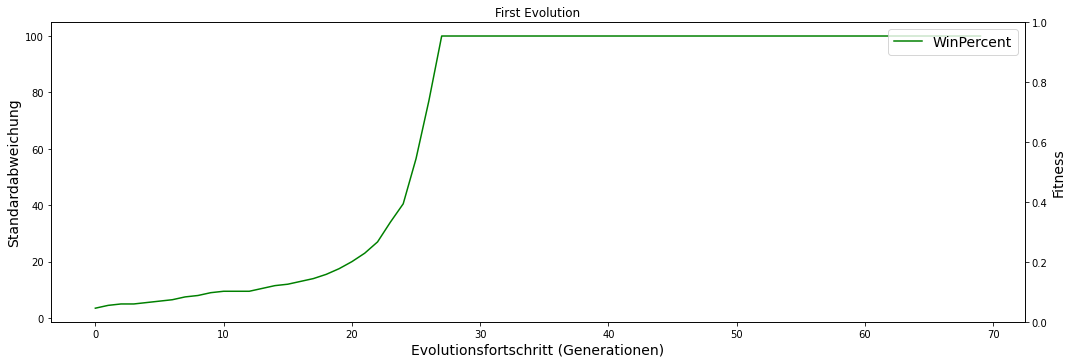

In [135]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Evolutionsfortschritt (Generationen)', fontsize=14)
ax1.set_ylabel('Standardabweichung', fontsize=14)

WinPercent, = ax1.plot(df_Mean['WinPercent'].values, color='green', label='WinPercent')
#Fitness, = ax1.plot(df_Mean["deff-ConquerRadius"].values, color='blue', label='Fitness')
#Fitness, = ax1.plot(df_Mean["off-ConquerRadius"].values, color='red', label='Fitness')
#Fitness, = ax1.plot(domi["off-AttackMinLife"].values, color='green', label='Fitness')
#Fitness, = ax1.plot(df_Mean["off-AttackMinLife"].values, color='blue', label='Fitness')
#Fitness, = ax1.plot(df_Mean["Score"].values, color='red', label='Fitness')
#Fitness, = ax1.plot(domi["attackActions"].values, color='green', label='Fitness')
#std, = ax1.plot(df_standardDeviation["deff-AttackMinLife"].values, color='blue', label='RadiusExpansionStep')
#std1, = ax1.plot(df_standardDeviation["off-AttackMinLife"].values, color='red', label='MaxConquerRadius')
#std2, = ax1.plot(df_standardDeviation["supp-AttackMinLife"].values, color='green', label='InitialConquerRadius')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color='black'
ax2.set_ylabel('Fitness', color=color, fontsize=14)
#ax2.plot(domi["Winner"].values, color='red', label='Fitness')
#ax2.plot(df_Mean["Fitness"].values, color=color)
#ax2.plot(df_EA["Fitness"].values, color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.title('First Evolution')
plt.legend(handles = [WinPercent], fontsize=14)
plt.show()

## 3D Analyse der Pareto-front


<IPython.core.display.Javascript object>


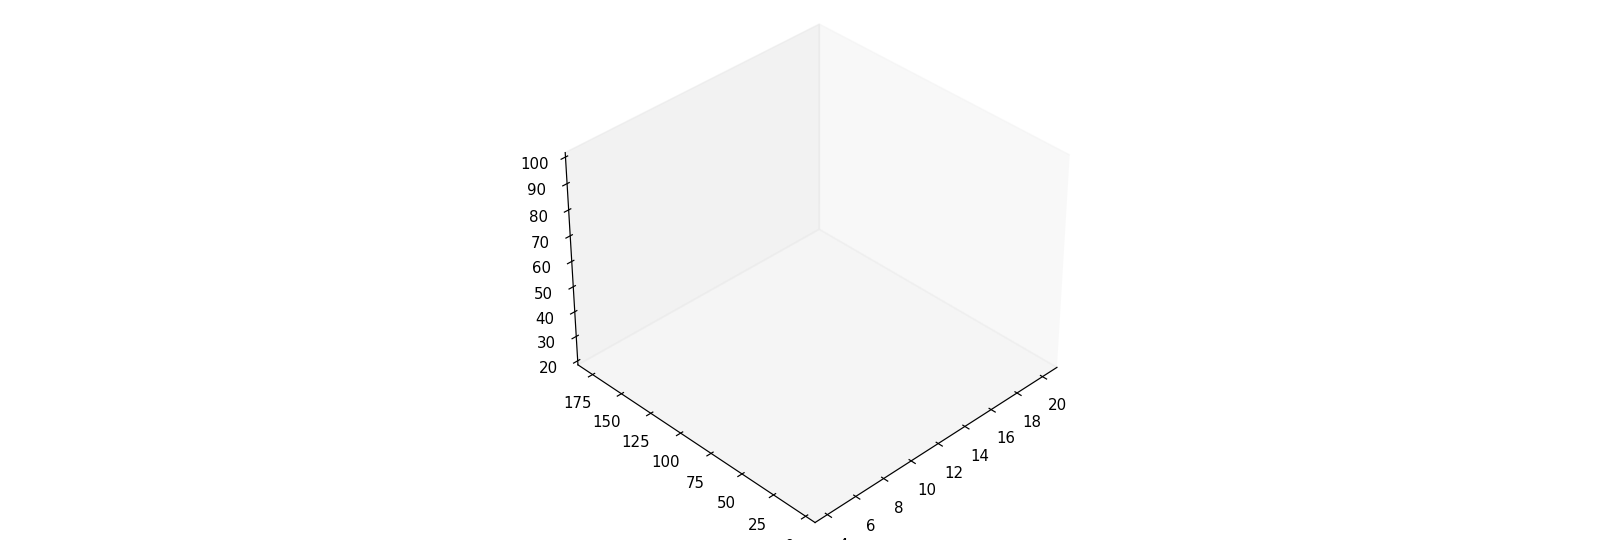

In [136]:
%matplotlib notebook
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d as plt3d

fig = plt.figure()
ax = plt3d.Axes3D(fig)

ax.view_init(45, -45)
ax.grid(False)
#ax.set_zlim(-100, 0)
#plt.xlim(0, 600)
#plt.ylim(0, 50)
colors1 = cm.colors.LinearSegmentedColormap.from_list("", ["red","red"])
colors2 = cm.colors.LinearSegmentedColormap.from_list("", ["green","green"])
colors3 = cm.colors.LinearSegmentedColormap.from_list("", ["blue","blue"])
#fig.colorbar(points, shrink=0.5, aspect=5)

domi1 = df_EA[df_EA['dominanceLevel'] == 1]
domi2 = df_EA[df_EA['dominanceLevel'] == 2]
domi3 = df_EA[df_EA['dominanceLevel'] == 3]
domi = domi2.iloc[domi2.index.get_level_values('Evolution') == 2]

# Data for three-dimensional scattered points
zdata = df_EA["deffScore"].values
xdata = df_EA["Score"].values
ydata = df_EA["suppScore"].values

#points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors, vmin=-85, vmax=-10);
points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors1)
#ax.plot_trisurf(xdata, ydata, zdata, cmap='viridis', edgecolor='none');
ax.set_title('Score');
ax.set_xlabel('Attack')
ax.set_ylabel('Support')
ax.set_zlabel('Defensive');


def animate_scatters(iteration, points,zdata,ydata,xdata):
    domiA = domi1.iloc[domi1.index.get_level_values('Evolution') == iteration]
    domiB = domi2.iloc[domi2.index.get_level_values('Evolution') == iteration]
    domiC = domi3.iloc[domi3.index.get_level_values('Evolution') == iteration]
    
    ax.clear()
    ax.set_title("Score");
    ax.grid(False)
    #ax.set_zlim(-500, 0)
    #plt.xlim(0, 1500)
    #plt.ylim(0, 100)
    
    # Data for three-dimensional scattered points
    zdata = domiA["deffScore"].values
    xdata = domiA["Score"].values
    ydata = domiA["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors1)
    zdata = domiB["deffScore"].values
    xdata = domiB["Score"].values
    ydata = domiB["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors2)
    zdata = domiC["deffScore"].values
    xdata = domiC["Score"].values
    ydata = domiC["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors3)
    
    return points

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate_scatters, fargs=(points,zdata,ydata,xdata), interval=1000, blit=False)
plt.show()